# Grover's Algorithm

*Grover's algorithm* is a quantum search algorithm to find a specific item in an unsorted database. It is considered to be one of the algorithm which shows the quantum speedup over the classical algorithm based on the quantum parallelism and superposition. 

In this tutorial, we will have a look at the Grover's algorithm step by step for $n = 2$ qubit case. 

In [17]:
%pip install qiskit --upgrade 


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import packages

In [18]:
from qiskit import QuantumCircuit,  Aer

from math import sqrt, floor

In [19]:
simulator = Aer.get_backend("statevector_simulator")

### Step1. Initialization of the circuit 

To start with, we make an equiprobable superposition of all possible $N = 2^n$ states using *Hadamard gates* on $n$ qubits. 
$$
|s\rangle = H^{\otimes n}|0\rangle^n = \frac{1}{\sqrt{N}} \sum_{x=0}^{N- 1} |x\ = |\psi_0\rangle
$$


__Geometric interetation__ Let us call $|t\rangle$ the target state and $|r\rangle$ the state such that $ |r\rangle \perp |t\rangle$ and $ |s\rangle \in Span\{|t\rangle, |r\rangle\}$. We can also write down $|s\rangle$ in terms of $|t\rangle$ and $|r\rangle$ as : 
$$
|s\rangle = \sin \theta |t\rangle + \cos \theta |r\rangle. 
$$

with $\theta = \arcsin \langle s | t \rangle = \arcsin \frac{1}{\sqrt{N}} $. 

<img src="images/grover1.jpg" alt="grover1" width="300"/>



In [20]:
n_qubits = 2

In [21]:
def initialization(qc) : 
    # Create an equiprobable superposition of all possible states 
    ###### To do ######
    for i in range(n_qubits): qc.h(i)
    
    ###################
    return qc


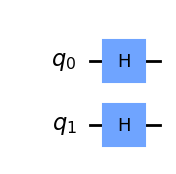

In [22]:
circuit = QuantumCircuit(n_qubits)

circuit = initialization(circuit)
circuit.draw(output = 'mpl')

### Step2. Oracle

In Grover's algorithm, the *oracle* function aims to mark the target item as a *special* state by inversing its phase. For example, let us consider the target state $|t\rangle = |01\rangle$ in $n = 2$ qubits case. Then, the oracle will transform 

$$|\psi_0\rangle = |00\rangle + |01\rangle + |10\rangle + |11\rangle$$

into 
$$
|\psi_1\rangle = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle + |11\rangle)
$$

__Geometric interetation__ Geometrically, the orcale reflects the state $|\psi_0\rangle = |s\rangle $ about $|r\rangle$ axis, making the phase of $|t\rangle$ to be negative :  
$$
|\psi_1\rangle = -\sin \theta |t\rangle + \cos \theta |r\rangle 
$$

<img src="images/grover2.jpg" alt="grover2" width="300"/>

In [23]:
# Oracle for 2 qubits
def Uw(qc = QuantumCircuit, target = str) -> QuantumCircuit : 
    if len(target) == 2:
        if (target.count('0') + target.count('1') == len(target)) : 
            if target[0] == '0' : 
                qc.s(0)
            if target[1] == '0' : 
                qc.s(1)
            qc.cz(0,1)

            if target[0] == '0' : 
                qc.s(0)
            if target[1] == '0' : 
                qc.s(1)
                
            return qc
        else  : 
            raise ValueError("Target state not binary")
    else :  
        raise NotImplementedError("Oracle implemented for two qubits")

Statevector([ 0.5+0.j, -0.5-0.j,  0.5+0.j,  0.5+0.j],
            dims=(2, 2))


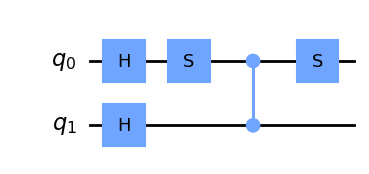

In [24]:
# Test oracles

target_state = '01' 

circuit = QuantumCircuit(n_qubits) 
circuit = initialization(circuit)
cirucit = Uw(circuit, target_state)

job = simulator.run(circuit)

# Execute the job
result = job.result() 

state = result.get_statevector(circuit, decimals = 4)
print(state)

circuit.draw(output = 'mpl')

### Step3. Amplitude Amplification


$$
U_s = 2|s\rangle\langle s|-I 
$$
where $|s\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N- 1} |x\rangle$ for $N = 2^n$ . 

$U_s$ is called as the *Diffuser* which inverts the states around the mean. 
Let's see how $U_s$ affects the superposition of states. 

__E.g.__ 2 qubits, $|t\rangle = |01\rangle$
$$
|\psi1\rangle = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle + |11\rangle)
$$

1. Apply Hadamard gates to each qubit
$$
|\psi'_1\rangle = H^{\otimes 2}|\psi_1\rangle  = \frac{1}{2}(|00\rangle + |01\rangle - |10\rangle + |11\rangle)
$$


2. Apply phase 
$|0\rangle \to |0\rangle, |x\rangle \to - |x\rangle$ for $x > 0$   
$$
U_{phase} = Diag\{1, -1, ..., -1\} = -Diag\{-1, 1,...,1\} = - CPhase_0 
$$
where $CPhase_0$ is a conditional phase shift to $|0\rangle$ only. 

$$
|\psi'_2\rangle = U_{phase}|\psi'_1\rangle = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)
$$
3. Apply Hadamard gates to each qubit
$$
|\psi'_3\rangle = H^{\otimes 2}|\psi'_2\rangle = |01\rangle = |\psi_2\rangle
$$


__Geometric Interpretation :__ Geometrically, $U_s = 2|s\rangle\langle s | - I$ corresponds to the reflection about the state $|s\rangle$. 

<img src="images/grover3.jpg" alt="grover2" width="300"/>

__Task :__ Show that in the two-qubit case, $U_{phase} = CZ_{01} Z_0 Z_1$ using `aer.unitary_simulator`. 

In [25]:
def Uphase(qc) : 
    if n_qubits == 2: 
        ###### To do ######
        qc.z(0)
        qc.z(1)
        qc.cz(0, 1)
        ###################
    #elif n_qubits == 3 :  # Uncomment for advanced task
    return qc

In [26]:
unitary_simulator = Aer.get_backend('unitary_simulator')

###### To do ######
circuit = QuantumCircuit(2)
circuit = Uphase(circuit)

job = unitary_simulator.run(circuit)
result = job.result()

###################

# Show the results
print(result.get_unitary(circuit, decimals=3))



Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [-0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j],
          [-0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [27]:
def amplitude_amplification(qc) : 
    for i in range(n_qubits) : 
        qc.h(i) 
    
    qc = Uphase(qc) 

    for i in range(n_qubits) : 
        qc.h(i)

    return qc

### Step 4. Iteration 

As we have seen above, the combined transformation $U_sU_w$ rotates the initial vector with an angle $2\theta$ towards the target state $|t\rangle$. After $k$ iterations of $U_sU_w$, we expect the probability of measuring $|t\rangle$ to be optimal. 

$$
\frac{\pi}{2} = (2k + 1)\theta = (2k + 1)\arcsin \frac{1}{\sqrt{N}} \\
\to k = \frac{\pi}{4\arcsin{\sqrt{1/N}}} - \frac{1}{2} =  \frac{\sqrt{N}\pi}{4} - \frac{1}{2} + \mathcal{O}\frac{1}{\sqrt{N}},
$$
using $\arcsin{x} = x + \mathcal{O}(x^3)$. 
This demonstrates a quadratic speedup of Grover's algorithm compared to the classical search algorithm with the complexity $\mathcal{O}(N)$. 


In [28]:
def grover(qc, target, n_iter) : 
    qc = initialization(qc) 

    for _ in range(n_iter) : 
        qc = Uw(qc, target)
        qc = amplitude_amplification(qc) 
    
    return qc

In [29]:
n_iter = floor(sqrt(2**n_qubits))
n_iter = 1
print(n_iter)
target_state = '01'

1


In [30]:
qasm_simulator = Aer.get_backend("qasm_simulator")

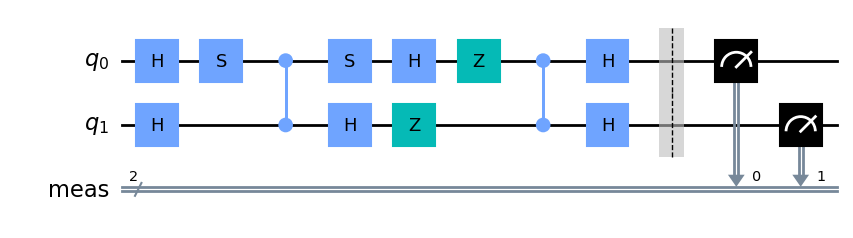

In [31]:
circuit = QuantumCircuit(n_qubits) 
circuit = grover(circuit, target_state, n_iter)
circuit.measure_all() 

circuit.draw(output = 'mpl')

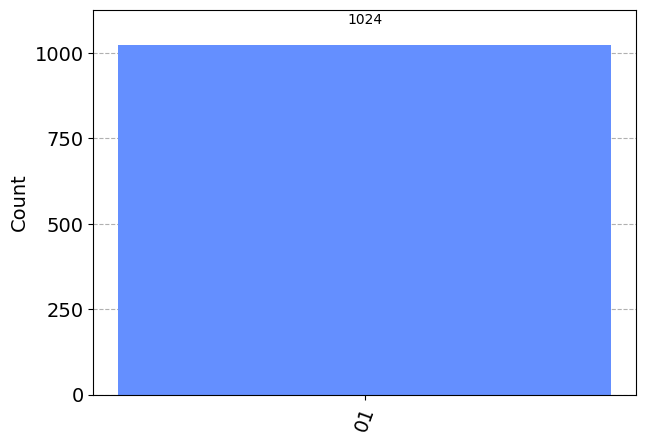

In [32]:
from qiskit.visualization import plot_histogram

job = qasm_simulator.run(circuit, shots = 1024)

# Execute the job
result = job.result() 

counts = result.get_counts() 

plot_histogram(counts)

### Advanced task 

Correct the codes above to implement the Grover's algorithm for 3 qubits case.